In [1]:
import nltk, gensim, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from scipy import stats

sns.set_context('talk')

In [6]:
df = pd.read_csv('wrangled_data.csv')
df.set_index('LISTING_ID', inplace = True, drop = True)

In [7]:
df.head()

,BODY,PRICE,AREA_SQFT,ALLOWS_CATS,ALLOWS_DOGS
LISTING_ID,,,,,
7075306172,PROPERTY INFO ID: 32252124Rent: 2275 / MonthBe...,2275,900.0,1.0,0.0
7075321793,PROPERTY INFO ID: 1281339Rent: 2350 / MonthBed...,2350,800.0,1.0,0.0
7075372720,PROPERTY INFO ID: 2741631Rent: 2395 / MonthBed...,2395,875.0,1.0,0.0
7075376264,PROPERTY INFO ID: 2741631Rent: 2395 / MonthBed...,2395,875.0,1.0,0.0
7075380613,PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...,2450,950.0,1.0,0.0


In [8]:
df.shape

(126358, 5)

### Engineering features from the 'BODY' column will be the focus of this notebook

In [97]:
 print(pd.DataFrame(raw_data.BODY[:10]))

                                                BODY
0  Big 4 Bedroom Fully Renovated off Shrewsbury S...
1  PROPERTY INFO ID: 32252124Rent: 2275 / MonthBe...
2  PROPERTY INFO ID: 1281339Rent: 2350 / MonthBed...
3  PROPERTY INFO ID: 32252343Rent: 2350 / MonthBe...
4  PROPERTY INFO ID: 32252343Rent: 2350 / MonthBe...
5  PROPERTY INFO ID: 2741631Rent: 2395 / MonthBed...
6  PROPERTY INFO ID: 2741631Rent: 2395 / MonthBed...
7  PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...
8  PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...
9  MustSeeProperties.com provides the Complete Pa...


In [98]:
 raw_data.BODY[0]

'Big 4 Bedroom Fully Renovated off Shrewsbury Street w/ 4 Large Bedrooms, Modern Eat-in kitchen, Luxury Tiled Bathrooms, Washer/dryer Hookups, Very Efficient Gas Heat, High Ceilings, Walk-in Closets & New Flooring!! PLEASE CONTACT PAUL LATINO OF RE/MAX ADVANTAGE show contact info !!'

In [104]:
def word_count(listing):
    words = listing.split()
    return len(words)

In [109]:
def avg_word_length(listing):
    words = listing.split()
    word_lengths = [len(word) for word in words]
    return sum(word_lengths)/len(words)

In [110]:
raw_data['BODY_CHAR_COUNT'] = raw_data.BODY.apply(len)
raw_data['BODY_WORD_COUNT'] = raw_data.BODY.apply(word_count)
raw_data['BODY_AVG_WORD_LENGTH'] = raw_data.BODY.apply(avg_word_length)

In [114]:
raw_data[['BODY_CHAR_COUNT', 'BODY_WORD_COUNT', 'BODY_AVG_WORD_LENGTH']].describe()

,BODY_CHAR_COUNT,BODY_WORD_COUNT,BODY_AVG_WORD_LENGTH
count,134854.000000,134854.000000,134854.000000
mean,977.573272,150.757456,5.489535
std,703.183128,109.218269,0.684112
min,1.000000,1.000000,1.000000
25%,469.000000,73.000000,5.086420
50%,784.000000,120.000000,5.453782
75%,1308.000000,202.000000,5.852174
max,15236.000000,2282.000000,78.000000


In [112]:
print('Average number of characters per listing:', np.mean(raw_data['BODY_CHAR_COUNT']))
print('Average number of words per listing:', np.mean(raw_data['BODY_WORD_COUNT']))
print('Average word length per listing:', np.mean(raw_data['BODY_AVG_WORD_LENGTH']))


Average number of characters per listing: 977.573271834725
Average number of words per listing: 150.75745621190325
Average word length per listing: 5.48953486557127


In [ ]:
raw_data['BODY_CHAR_COUNT']

{'whiskers': [<matplotlib.lines.Line2D at 0x2798d02eaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2798d097fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2798d02ef40>],
 'medians': [<matplotlib.lines.Line2D at 0x2798d097490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2798d097370>],
 'means': []}

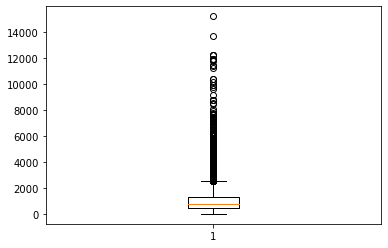

In [123]:
plt.boxplot(raw_data['BODY_CHAR_COUNT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2798d5f9100>,
 'caps': [<matplotlib.lines.Line2D at 0x2798d5f9ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2798d5f9640>],
 'medians': [<matplotlib.lines.Line2D at 0x2798d0eabb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2798d0ea490>],
 'means': []}

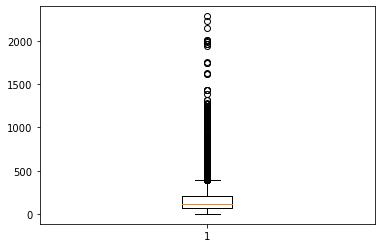

In [122]:
plt.boxplot(raw_data['BODY_WORD_COUNT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2798d624f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2798d6191f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2798d624910>],
 'medians': [<matplotlib.lines.Line2D at 0x2798d619df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2798d619d30>],
 'means': []}

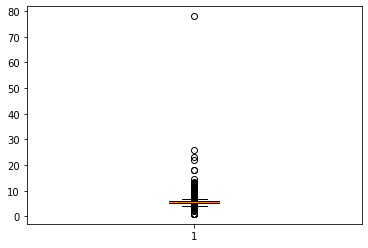

In [121]:
plt.boxplot(raw_data['BODY_AVG_WORD_LENGTH'])

In [ ]:
#Other possible features to generate: # of sentences, # of paragraphs, # capitalized words, # all-capital words, # numeric quantities